In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, 1])

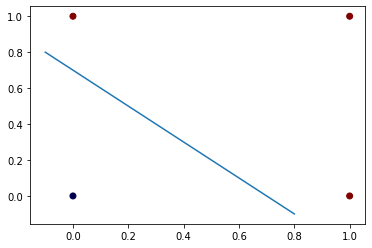

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='seismic')
plt.plot([-0.1, 0.8], [0.8, -0.1])
plt.show()

In [0]:
def compute_y(x, W, bias):
    # dreapta de decizie
    # [x, y] * [W[0], W[1]] + b = 0
    EPSILON = 1e-10
    return (-x * W[0] - bias) / (W[1] + EPSILON)

def plot_decision_boundary(X, y, W, b, current_x, current_y):
    x1 = -0.5
    y1 = compute_y(x1, W, b)
    x2 = 0.5
    y2 = compute_y(x2, W, b)
    
    # sterge continutul ferestrei

    # ploteaza multimea de antrenare
    color = 'r'
    if current_y == -1:
        color = 'b'
    plt.ylim((-1, 2))
    plt.xlim((-1, 2))
    plt.plot(X[y == -1, 0], X[y == -1, 1], 'b+')
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'r+')

    # ploteaza exemplul curent
    plt.plot(current_x[0], current_x[1], color+'s')

    # afisarea dreptei de decizie
    plt.plot([x1, x2] ,[y1, y2], 'black')

In [0]:
W = np.random.randn(2)
b = np.random.randn(1)

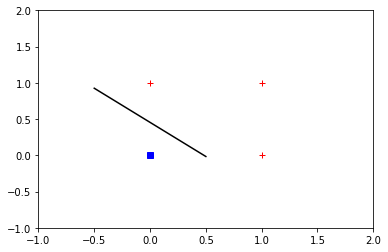

In [0]:
plot_decision_boundary(X, y, W, b, X[0], y[0])
plt.show()

In [0]:
epochs = 70
learning_rate = 1e-1

total_loss = 0
total_count = 0
for epoch in range(epochs):
    for x, y_true in zip(X, y):
        y_hat = x @ W + b
        y_diff = y_hat - y_true
        loss = (y_diff ** 2) / 2
        total_loss += loss.item()
        W -= learning_rate * y_diff * x
        b -= learning_rate * y_diff
    total_count += len(y)

average_loss = total_loss / total_count
print(average_loss)

0.34437283099315025


In [0]:
num_hidden_neurons = 3

W_1 = np.random.randn(2, num_hidden_neurons)
b_1 = np.zeros(num_hidden_neurons)

W_2 = np.random.randn(num_hidden_neurons, 1)
b_2 = np.zeros(1)

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward(X):
    z_1 = X @ W_1 + b_1
    a_1 = np.tanh(z_1)
    z_2 = a_1 @ W_2 + b_2
    a_2 = sigmoid(z_2)
    return z_1, a_1, z_2, a_2

z_1, a_1, z_2, a_2 = forward(X)


loss = (-y * np.log(a_2) - (1 - y) * np.log(1 - a_2)).mean()
accuracy = (np.round(a_2) == y).mean()

In [0]:
def backward(a_1, a_2, z_1, W_2, X, Y, num_samples):
    dz_2 = a_2 - y
    dw_2 = (a_1.T @ d_z2) / num_samples
    db_2 = np.sum(dz_2) / num_samples
    da_1 = dz_2 @ W_2.T

    dz_1 = da_1 * tanh_derivative(z_1)

    dw_1 = X.T @ dz_1 / num_samples

    db_1 = np.sum(dz_1) / num_samples

    return dw_1, db_1, dw_2, db_2